In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
bench = BenchmarkSet("iaml_xgboost", download = False)
bench.config_space

Configuration space object:
  Hyperparameters:
    alpha, Type: UniformFloat, Range: [0.00010000000000000009, 999.9999999999998], Default: 0.316227766, on log-scale
    booster, Type: Categorical, Choices: {gblinear, gbtree, dart}, Default: gblinear
    colsample_bylevel, Type: UniformFloat, Range: [0.01, 1.0], Default: 0.505
    colsample_bytree, Type: UniformFloat, Range: [0.01, 1.0], Default: 0.505
    eta, Type: UniformFloat, Range: [0.00010000000000000009, 1.0], Default: 0.01, on log-scale
    gamma, Type: UniformFloat, Range: [0.00010000000000000009, 6.999999999999999], Default: 0.0264575131, on log-scale
    lambda, Type: UniformFloat, Range: [0.00010000000000000009, 999.9999999999998], Default: 0.316227766, on log-scale
    max_depth, Type: UniformInteger, Range: [1, 15], Default: 8
    min_child_weight, Type: UniformFloat, Range: [2.718281828459045, 149.99999999999997], Default: 20.1926292064, on log-scale
    nrounds, Type: UniformInteger, Range: [3, 2000], Default: 77, on lo

In [60]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [82]:
def plot_true_lc(ccc, yid = 1):
    # Subset data to obtain learning curve for config
    config = pd.DataFrame(data = ccc, index = [0])
    config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
    pdf = df.merge(config, on=list(config.columns.values))
    pdf = pdf.sort_values("trainsize")
    plt.plot(pdf[bench.config.fidelity_params[0]], pdf[bench.config.y_names[1]], marker = "o")

In [83]:
def plot_lc_lcbench(ccc):
    ccc["OpenML_task_id"] = str(ccc["OpenML_task_id"])
    res = []
    for j in range(5):
        out = []
        for i in range(51):
            val = ccc.copy()
            val.update({"epoch" : i+1})
            out.append(bench.objective_function(val)['val_accuracy'])
        res.append(out)
        
    colors = ['red', 'blue','orange', 'purple','green',]
    for i in range(5):
        plt.plot(range(51), res[i], color=colors[i])

def plot_lc_rbv2(ccc):
    ccc["task_id"] = str(ccc["task_id"])
    ccc['repl'] = 1
    res = []
    bench.check - False
    for j in range(5):
        out = []
        for i in range(95):
            val = ccc.copy()
            val.update({"trainsize" : i / 100. + 0.05})
            if j < 0:
                out.append(bench.objective_function(val)[bench.config.y_names[0]])
            else:
                mn = 0
                for k in range(500):
                    mn += bench.objective_function(val)[bench.config.y_names[0]]
                out.append(mn)               
        res.append(out / 100.)
        
    colors = ['red', 'blue','orange', 'purple','green']
    for i in range(5):
        plt.plot([x / 100 + 0.05 for x in range(95)], res[i], color=colors[i])

def plot_lc_iaml(ccc):
    ccc = {k: v for k, v in ccc.items() if pd.Series(v).notna().all()}
    ccc["task_id"] = str(ccc["task_id"])
    res = []
    bench.check = False
    out = []
    for i in range(95):
        val = ccc.copy()
        val.update({"trainsize" : i / 100. + 0.05})
        out.append(bench.objective_function(val)[bench.config.y_names[1]])
        res.append(out)                    
    colors = ['red']
    plt.plot([x / 100 + 0.05 for x in range(95)], res[0], color=colors[0])


{'alpha': 27.428518, 'booster': 'dart', 'lambda': 0.00021242494, 'nrounds': 509.0, 'subsample': 0.33299062, 'task_id': 41146, 'trainsize': 0.1, 'colsample_bylevel': 0.19486125, 'colsample_bytree': 0.7341542, 'eta': 0.39063755, 'gamma': 0.0003413536, 'max_depth': 10.0, 'min_child_weight': 5.9011073, 'rate_drop': 0.47382692, 'skip_drop': 0.3877276}


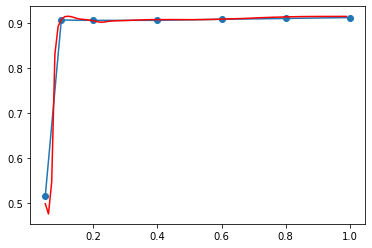

In [89]:
# Draw a sample configuration
ccc = df.sample(1).to_dict()
ccc = {k:list(ccc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
print(ccc)
plot_true_lc(ccc)
plot_lc_iaml(ccc)


In [40]:
bench.config.fidelity_params

['trainsize']

In [10]:
ccc = df.sample(1).to_dict()
ccc

{'task_id': {1188247: 41146},
 'trainsize': {1188247: 0.2},
 'booster': {1188247: 'gbtree'},
 'nrounds': {1188247: 1792},
 'eta': {1188247: 0.0141838939283185},
 'gamma': {1188247: 0.0113474520445439},
 'lambda': {1188247: 18.6838303514871},
 'alpha': {1188247: 0.0639125198817879},
 'subsample': {1188247: 0.79392009829171},
 'max_depth': {1188247: 13.0},
 'min_child_weight': {1188247: 37.5623208496695},
 'colsample_bytree': {1188247: 0.480777007266879},
 'colsample_bylevel': {1188247: 0.619972503499594},
 'rate_drop': {1188247: nan},
 'skip_drop': {1188247: nan},
 'mmce': {1188247: 0.0882122713414634},
 'f1': {1188247: 0.909445925505636},
 'auc': {1188247: 0.957296841491894},
 'logloss': {1188247: 0.27104692091708},
 'ramtrain': {1188247: 36.5},
 'rammodel': {1188247: 1.141976},
 'rampredict': {1188247: 11.9},
 'timetrain': {1188247: 1.80900000000111},
 'timepredict': {1188247: 0.221999999999753},
 'mec': {1188247: 1.98912779658092},
 'ias': {1188247: 0.0019900728559028},
 'nf': {11882